In [30]:
!pwd

/d/Dropbox/DOCTORADO/_python


In [31]:
#VIERNES A LAS 13:00
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel

# ds083  GFS    NAM
# 1deg   0.5deg  12km
# p1s1   p2s2   p7s7
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [32]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5' ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
zlev = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
zsod = [530, 540, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

expruns[7]

'20120816_d03_nam32_p1r3'

In [33]:
d1 = '/media/rello/HDD/d03/'
d2 = '../../../../../d03/'
d3 = '../../../Rello/D03/'

f = d3+expruns[5]+'.nc'
print(f)


../../../Rello/D03/20120816_d03_gfs05_p2r5.nc


In [34]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
t1, t2, t3, t4 = '2012-08-16 12:30', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'
t1, t4 = '2012-08-17 00:00', '2012-08-18 23:30'
tt1, tt4 = 24, 120

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values
stime = sread_w.iloc[:,ids][t1:t4]

# Datos Promediados #
wrf1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'][tt1:tt4].values
wrf2 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'][tt1:tt4].values
wrf3 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'][tt1:tt4].values
wrf4 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'][tt1:tt4].values
wrf5 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'][tt1:tt4].values
wrf6 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'][tt1:tt4].values
wrf7 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'][tt1:tt4].values
wrf8 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'][tt1:tt4].values
wrf9 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'][tt1:tt4].values
wrf10 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'][tt1:tt4].values
wrf11 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'][tt1:tt4].values
wrf12 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'][tt1:tt4].values
wrftime = to_np(xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'][tt1:tt4].Time)

#print(wrftime.size, wrf1.shape, sodarw.shape, date1, date2)

# REVISAR QUE COINCIDAN LOS TIEMPOS, UTC LT
Al UTC se le restan 8 Horas en el pacifico y 6 horas en CDMX

In [35]:
# Funcion para calcular tiempo de grafica
xp = 0 
tt = 0
def utcwrf(tt, timedelta):   
    ttw = 72+tt*3 # Se le suman 12 horas (72 dt) para el comenzar en 2012-08-17 00:00:00
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw)
    wt = to_np(wa[0,0,0].Time)
    localt = wt + np.timedelta64(timedelta, 'h')
    t = pd.to_datetime(str(localt))
    sodartp = stime.index[tt]
    print('ncwrf ', wt, 'nclocalt ', t,  'sodart', sodartp)
    return(ttw, t, sodartp)
        
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

ncwrf  2012-08-17T06:00:00.000000000 nclocalt  2012-08-17 00:00:00 sodart 2012-08-17 00:00:00


In [36]:
pd.to_datetime(str(wrftime[tt])) 

Timestamp('2012-08-17 00:00:00')

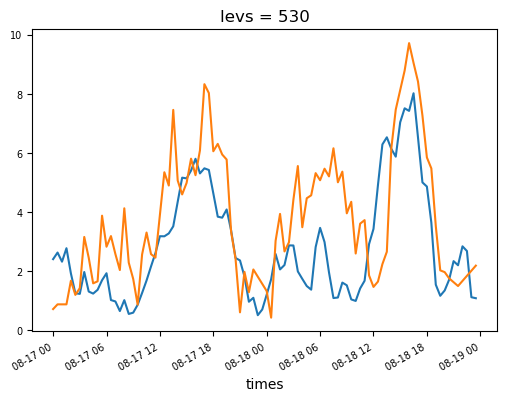

In [37]:
wrfs = [wrf1, wrf2, wrf3, wrf4, wrf5, wrf6, wrf7, wrf8, wrf9, wrf10, wrf11, wrf12]
#wrfs[11][0][95]
xp = 0
tt = 10
## http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray
#da = xr.DataArray(wrf1, dims=("times", "levs"), coords={"times": wrftime, "levs": zsod})
da = xr.DataArray(wrfs, dims=("xp", "times", "levs"), coords={"xp": np.arange(12), "times": wrftime, "levs": zsod})
da[1,:,0].plot()

sodw = sread_w.iloc[:,ids][t1:t4].interpolate()
ds = xr.DataArray(sodw.astype('float32'), dims=("times", "levs"), coords={"times": wrftime, "levs": zsod})
#ds.astype('float32')
ds[:,0].plot()

In [38]:
### Correr en Workstation   ####  
#ls /mnt/sda2/exp6_llj/d03/

In [39]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel, vertcross, CoordPair, latlon_coords
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
np.set_printoptions(precision=2)

In [40]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from wrf import to_np, latlon_coords
# https://matplotlib.org/examples/color/named_colors.html 

def levPlot6t(xp,tt,lev,vmin,vmax):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(9,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04)

    ttw , t, _ = utcwrf(tt, timedelta)
    fig.suptitle('Jet Nocturno '+t.strftime('%d-Ago %H:%Mh')+' @ '+zlev[lev], fontsize=16)
    fig.text(0.0, 0.5, 'Latitud', va='center', rotation='vertical')
    fig.text(0.5, 0.05, 'Longitud', va='center', rotation='horizontal')
    
    for line in range(2):
        for cols in range(3):
            ax = axs[line,cols]   
            axs[line,cols].set_title(expnames[xp]+'\n', y=0.95, fontsize=10)
            axs[line,cols].tick_params(axis="x", rotation=12, labelsize=8) 
            axs[line,cols].tick_params(axis="y", rotation=12, labelsize=8) 
            fd =d3+expruns[xp]+'.nc'
            ncfile = Dataset(fd)          
################
            ua = getvar(ncfile, "ua", units="m s-1", timeidx=ttw)
            va = getvar(ncfile, "va", units="m s-1", timeidx=ttw)
            #tv = getvar(ncfile, "tk", units="degC", timeidx=ttw)
            tc = getvar(ncfile, "tc", timeidx=ttw)
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=ttw)   
            
            lats, lons = latlon_coords(ua)
            lats, lons = to_np(lats), to_np(lons)
            va = to_np(va[lev,:,:])
            ua = to_np(ua[lev,:,:])
            #tv = to_np(tv[lev,:,:])
            tc = to_np(tc[lev,:,:])
            UV = to_np(uv[lev,:,:])

################

            axs[line,cols].scatter(lons[24,20],lats[24,20], color='y', edgecolors='w', zorder=5)
    
            vmin, vmax = vmin, vmax 
            if vmax == 99:
                CF = axs[line,cols].contourf(lons, lats, tc, 10, cmap=get_cmap("jet"))
            else:
                levels = np.arange(vmin,vmax,0.5)
                CF = axs[line,cols].contourf(lons, lats, tc, 10, levels=levels, vmin=vmin, vmax=vmax, cmap=get_cmap("jet"))
            #fig.colorbar(CF, ax=axs[line,cols])
            
            clevels = np.arange(20,35,1)
            #CS = axs[line,cols].contour(lons, lats, tv, levels=clevels, colors='w')
            CS = axs[line,cols].contour(lons, lats, tc, levels=clevels, colors='w')
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='w', fontsize=10)
            
            sk = 4
            Q = axs[line,cols].quiver(lons[::sk,::sk], lats[::sk,::sk], ua[::sk,::sk], va[::sk,::sk], scale=50, pivot='mid')
            axs[line,cols].quiverkey(Q, X=0.75, Y=1.07, U=5, label=' 5 m/s', labelpos='E')
            xp+=1
    fig.colorbar(CF, ax=axs, orientation='vertical', fraction=.05, pad=0.015)
    #print(da[xp][tt][:].data, '\n', sodarw[tt,:])       

In [41]:

def hovtLLJuv1(xp,tt,angle,vmin,vmax,zbot,ztop):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(11,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04)
    axs[0,0].set_ylabel('Altitud [m]')
    axs[1,0].set_ylabel('Altitud [m]')
    
    ttw , t, _ = utcwrf(tt, timedelta)

    fig.suptitle('Temperatura Jet Nocturno '+t.strftime('%d-Ago %H:%Mh'), fontsize=16)

    for line in range(2):
        for cols in range(3):
            ax = axs[line,cols]        
            fd =d3+expruns[xp]+'.nc'
            ncfile = Dataset(fd)
##########
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=ttw)   
            va = getvar(ncfile, "va", units="m s-1", timeidx=ttw)
            wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw)
            tc = getvar(ncfile, "tc", timeidx=ttw)
            p = getvar(ncfile, "p", timeidx=ttw, units="mb")
            z = getvar(ncfile, "z", units="m", timeidx=ttw)
            # Define a pivot point and angle in grid coordinates
            pivot_point = CoordPair(x=21, y=26)
##########
            # Calculate the vertical cross section.  By setting latlon to True, this
            ua_vert = vertcross(ua, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle)) 
            uv_abs  = np.absolute(uv_pver)
            w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            tc_vert = vertcross(tc, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            z_vert = uv_vert.vertical.values
            coord_pairs = to_np(uv_vert.coords["xy_loc"])

##########
            if xp == 0 or xp == 6:
                lats, lons = {}, {}
                for i in range(coord_pairs.size):
                    lats[i] = uv_vert.xy_loc.values[i].lat
                    lons[i] = uv_vert.xy_loc.values[i].lon

                lons = np.array(list(lons.values()))
                lats = np.array(list(lats.values()))
                LONS, ZHOV = np.meshgrid(lons, z_vert)
                
                coords = []*lats.size
                for k in range(lats.size):
                    coor = "%0.2f" % (lats[k])+","+"%0.2f" % (lons[k])
                    coords.append(coor)
                
##########            
            axs[line,cols].plot([-103.7692]*2,[550,1000], color='purple')
            
            vmin, vmax = vmin, vmax         
            if vmax == 99:
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, cmap=plt.cm.rainbow)
            else:
                levels = np.arange(vmin,vmax,0.5)
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, levels=levels, vmin=vmin, vmax=vmax, cmap=plt.cm.rainbow)
            #fig.colorbar(CF, ax=axs[line,cols])
            
            Q = axs[line,cols].quiver(LONS[:,::2], ZHOV[:,::2], uv_pver[:,::2], w_vert[:,::2], pivot='mid', scale=70, width=0.0030)
            axs[line,cols].quiverkey(Q, X=0.75, Y=1.10, U=5, label=' 5 m/s', labelpos='E')

            tmin, tmax = 820, 960
            levels = np.arange(tmin, tmax, 1)
            #CS = axs[line,cols].contour(LONS, ZHOV, tc_vert, colors='whitesmoke', levels=levels)
            CS = axs[line,cols].contour(LONS, ZHOV, p_vert, colors='whitesmoke')
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='whitesmoke', fontsize=8)
                 
            axs[line,cols].set_facecolor('mediumspringgreen')
            axs[line,cols].set_title(expnames[xp]+'\n', y=0.95, fontsize=10)

            mpl.rc('xtick', labelsize=7) 
            mpl.rc('ytick', labelsize=7)             
            axs[line,cols].set_xticks(lons[4::8])
            axs[line,cols].set_xticklabels(coords[4::8], rotation=18)

            xp += 1
    fig.colorbar(CF, ax=axs, orientation='vertical', fraction=.05, pad=0.015)
    #print(da[xp][tt][:].data, '\n', sodarw[tt,:])            
 #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)


In [42]:

def hovtLLJuv1p(xp,tt,angle,vmin,vmax,zbot,ztop):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(11,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04)
    axs[0,0].set_ylabel('Altitud [m]')
    axs[1,0].set_ylabel('Altitud [m]')
    
    ttw , t, _ = utcwrf(tt, timedelta)
    
    if xp > 5:
        xpn = 'NAM'
    else:
        xpn = 'GFS'
    
    fig.suptitle('WRF-'+xpn+' Temperatura y Componente VA Jet Nocturno '+t.strftime('%d-Ago %H:%Mh'), fontsize=16)

    for line in range(2):
        for cols in range(3):
            ax = axs[line,cols]        
            fd =d3+expruns[xp]+'.nc'
            ncfile = Dataset(fd)
##########
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=ttw)   
            ua = getvar(ncfile, "ua", units="m s-1", timeidx=ttw)   
            va = getvar(ncfile, "va", units="m s-1", timeidx=ttw) 
            wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw)
            tc = getvar(ncfile, "tc", timeidx=ttw)
            p = getvar(ncfile, "p", timeidx=ttw, units="mb")
            z = getvar(ncfile, "z", units="m", timeidx=ttw)
            # Define a pivot point and angle in grid coordinates
            pivot_point = CoordPair(x=21, y=26)
##########
            # Calculate the vertical cross section.  By setting latlon to True, this
            uv_vert = -vertcross(va, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            #uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle)) 
            
            #uv_abs  = np.absolute(uv_pver)
            w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            tc_vert = vertcross(tc, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            z_vert = uv_vert.vertical.values
            coord_pairs = to_np(uv_vert.coords["xy_loc"])

##########
            if xp == 0 or xp == 6:
                lats, lons = {}, {}
                for i in range(coord_pairs.size):
                    lats[i] = uv_vert.xy_loc.values[i].lat
                    lons[i] = uv_vert.xy_loc.values[i].lon

                lons = np.array(list(lons.values()))
                lats = np.array(list(lats.values()))
                LONS, ZHOV = np.meshgrid(lons, z_vert)
                
                coords = []*lats.size
                for k in range(lats.size):
                    coor = "%0.2f" % (lats[k])+","+"%0.2f" % (lons[k])
                    coords.append(coor)
                
##########  Profile Plot
            div = 15000
            ax.plot([-103.7692]*2,[550,1000], color='whitesmoke', linestyle='--')
            #ax.plot([-103.7692]+da[xp][tt][:].data/div, zsod, color='k')
            #ax.plot([-103.7692]+da[xp][tt][:].data/div, zsod, color='k')
            ax.plot([-103.7692]+da[xp][tt][:]/div, zsod, color='k')
            ax.plot([-103.7692]+(ds[tt,:])/div, zsod, color='blue')
            #ax.scatter(-103.7692, 540)
            
            vmin, vmax = vmin, vmax         
            if vmax == 99:
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, cmap=plt.cm.rainbow)
            else:
                levels = np.arange(vmin,vmax,0.5)
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, levels=levels, vmin=vmin, vmax=vmax, cmap=plt.cm.rainbow)
            #fig.colorbar(CF, ax=axs[line,cols])
            
            Q = axs[line,cols].quiver(LONS[:,::2], ZHOV[:,::2], uv_vert[:,::2], w_vert[:,::2], pivot='mid', scale=70, width=0.0030)
            axs[line,cols].quiverkey(Q, X=0.75, Y=1.10, U=5, label=' 5 m/s', labelpos='E')

            pmin, pmax = 820, 960
            levels = np.arange(pmin, pmax, 5)
            #CS = axs[line,cols].contour(LONS, ZHOV, tc_vert, colors='whitesmoke', levels=levels)
            CS = axs[line,cols].contour(LONS, ZHOV, p_vert, colors='whitesmoke')
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='whitesmoke', fontsize=8)
                 
            axs[line,cols].set_facecolor('mediumspringgreen')
            axs[line,cols].set_title(expnames[xp]+'\n', y=0.95, fontsize=10)

            mpl.rc('xtick', labelsize=7) 
            mpl.rc('ytick', labelsize=7)             
            axs[line,cols].set_xticks(lons[4::8])
            axs[line,cols].set_xticklabels(coords[4::8], rotation=18)

            xp += 1
    fig.colorbar(CF, ax=axs, orientation='vertical', fraction=.05, pad=0.015)
    #print(da[xp,tt,:].data, '\n', ds[tt,:].data)
 #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)


In [43]:
def hovtLLJuv2(xp,tt,angle,vmin,vmax,zbot,ztop):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(11,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04, hspace=0.3)
    axs[0,0].set_ylabel('Altitud [m]')
    axs[1,0].set_ylabel('Altitud [m]')
    
    dt = 0
    fig.suptitle('WRF Temperatura y Componente VA Jet Nocturno '+expnames[xp]+'\n', fontsize=16)

    for line in range(2):
        for cols in range(3):
            timedelta = -6
            _, t, _ = utcwrf(tt, timedelta)
            ax = axs[line,cols]        

##########
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=ttw+dt)   
            wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw+dt)
            tc = getvar(ncfile, "tc", timeidx=ttw+dt)
            z = getvar(ncfile, "z", units="m", timeidx=ttw+dt)
            # Define a pivot point and angle in grid coordinates
            pivot_point = CoordPair(x=21, y=26)
##########
            # Calculate the vertical cross section.  By setting latlon to True, this
            uv_vert = vertcross(uv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle)) 
            uv_abs  = np.absolute(uv_pver)
            w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            tc_vert = vertcross(tc, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            z_vert = uv_vert.vertical.values
            coord_pairs = to_np(uv_vert.coords["xy_loc"])

##########
        #if xp == 0 or xp == 6:
            lats, lons = {}, {}
            for i in range(coord_pairs.size):
                lats[i] = uv_vert.xy_loc.values[i].lat
                lons[i] = uv_vert.xy_loc.values[i].lon

            lons = np.array(list(lons.values()))
            lats = np.array(list(lats.values()))
            LONS, ZHOV = np.meshgrid(lons, z_vert)

            coords = []*lats.size
            for k in range(lats.size):
                coor = "%0.2f" % (lats[k])+","+"%0.2f" % (lons[k])
                coords.append(coor)
                
##########            
            axs[line,cols].plot([-103.7692]*2,[550,1000], color='purple')
            
            vmin, vmax = vmin, vmax         
            if vmax == 99:
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, cmap=plt.cm.rainbow)
            else:
                levels = np.arange(vmin,vmax,0.5)
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, levels=levels, vmin=vmin, vmax=vmax, cmap=plt.cm.rainbow)
            #fig.colorbar(CF, ax=axs[line,cols])
            
            Q = axs[line,cols].quiver(LONS[:,::2], ZHOV[:,::2], uv_pver[:,::2], w_vert[:,::2], pivot='mid', scale=70, width=0.0030)
            axs[line,cols].quiverkey(Q, X=0.80, Y=1.10, U=5, label=' 5 m/s', labelpos='E')

            tmin, tmax = 20, 35
            levels = np.arange(tmin, tmax, 1)
            CS = axs[line,cols].contour(LONS, ZHOV, tc_vert, colors='whitesmoke', levels=levels)
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='whitesmoke', fontsize=8)
                 
            axs[line,cols].set_facecolor('mediumspringgreen')
            axs[line,cols].set_title('\n'+t.strftime('%d-Ago %H:%Mh')+'\n', y=0.95, fontsize=10)

            mpl.rc('xtick', labelsize=7) 
            mpl.rc('ytick', labelsize=7)             
            axs[line,cols].set_xticks(lons[4::8])
            axs[line,cols].set_xticklabels(coords[4::8], rotation=18)

            dt += 18 
            
 #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)


In [44]:

def hovtLLJuv3(xp,tt,dt,angle,vmin,vmax,zbot,ztop):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(11,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04, hspace=0.3)
    axs[0,0].set_ylabel('Altitud [m]')
    axs[1,0].set_ylabel('Altitud [m]')
    
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
   
    fig.suptitle('WRF Temperatura y Componente VA Jet Nocturno '+expnames[xp]+'\n', fontsize=16)

    for line in range(2):
        for cols in range(3):
            ttw = 72+tt*3 # Se le suman 12 horas (72 dt) para el comenzar en fecha 17 agosto
            timedelta = -6
            _, t, _ = utcwrf(tt, timedelta)
            ax = axs[line,cols]        

##########
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=ttw+dt)   
            va = -getvar(ncfile, "va", units="m s-1", timeidx=ttw+dt)
            wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw+dt)
            tc = getvar(ncfile, "tc", timeidx=ttw+dt)
            p = getvar(ncfile, "p", timeidx=ttw+dt, units="mb")
            z = getvar(ncfile, "z", units="m", timeidx=ttw+dt)
            # Define a pivot point and angle in grid coordinates
            pivot_point = CoordPair(x=21, y=26)
##########
            # Calculate the vertical cross section.  By setting latlon to True, this
            uv_vert = vertcross(va, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle)) 
            p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            uv_abs  = np.absolute(uv_pver)
            w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            tc_vert = vertcross(tc, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            z_vert = uv_vert.vertical.values
            coord_pairs = to_np(uv_vert.coords["xy_loc"])

##########
        #if xp == 0 or xp == 6:
            lats, lons = {}, {}
            for i in range(coord_pairs.size):
                lats[i] = uv_vert.xy_loc.values[i].lat
                lons[i] = uv_vert.xy_loc.values[i].lon

            lons = np.array(list(lons.values()))
            lats = np.array(list(lats.values()))
            LONS, ZHOV = np.meshgrid(lons, z_vert)

            coords = []*lats.size
            for k in range(lats.size):
                coor = "%0.2f" % (lats[k])+","+"%0.2f" % (lons[k])
                coords.append(coor)
                
##########  Profile Plot
            div = 15000
            ax.plot([-103.7692]*2,[550,1000], color='whitesmoke', linestyle='--')
            #ax.plot([-103.7692]+da[xp][tt][:].data/div, zsod, color='k')
            #ax.plot([-103.7692]+da[xp][tt][:].data/div, zsod, color='k')
            ax.plot([-103.7692]+da[xp][tt][:]/div, zsod, color='k')
            ax.plot([-103.7692]+(ds[tt,:])/div, zsod, color='blue')
            #ax.scatter(-103.7692, 540)            
            #axs[line,cols].plot([-103.7692]*2,[550,1000], color='purple')
            
            vmin, vmax = vmin, vmax         
            if vmax == 99:
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, cmap=plt.cm.rainbow)
            else:
                levels = np.arange(vmin,vmax,0.5)
                CF = axs[line,cols].contourf(LONS, ZHOV, tc_vert, levels=levels, vmin=vmin, vmax=vmax, cmap=plt.cm.rainbow)
            #fig.colorbar(CF, ax=axs[line,cols])
            
            Q = axs[line,cols].quiver(LONS[:,::2], ZHOV[:,::2], uv_vert[:,::2], w_vert[:,::2], pivot='mid', scale=70, width=0.0030)
            axs[line,cols].quiverkey(Q, X=0.80, Y=1.10, U=5, label=' 5 m/s', labelpos='E')

            tmin, tmax = 20, 35
            levels = np.arange(tmin, tmax, 1)
            #CS = axs[line,cols].contour(LONS, ZHOV, p_vert, colors='whitesmoke', levels=levels)
            CS = axs[line,cols].contour(LONS, ZHOV, p_vert, colors='whitesmoke')
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='whitesmoke', fontsize=8)
                 
            axs[line,cols].set_facecolor('mediumspringgreen')
            axs[line,cols].set_title('\n'+t.strftime('%d-Ago %H:%Mh')+'\n', y=0.95, fontsize=10)

            mpl.rc('xtick', labelsize=7) 
            mpl.rc('ytick', labelsize=7)             
            axs[line,cols].set_xticks(lons[4::8])
            axs[line,cols].set_xticklabels(coords[4::8], rotation=18)

            tt = tt + dt 
    fig.colorbar(CF, ax=axs, orientation='vertical', fraction=.05, pad=0.015)
    #print(da[xp][tt][:].data, '\n', sodarw[tt,:])       
 #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)


ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00
ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


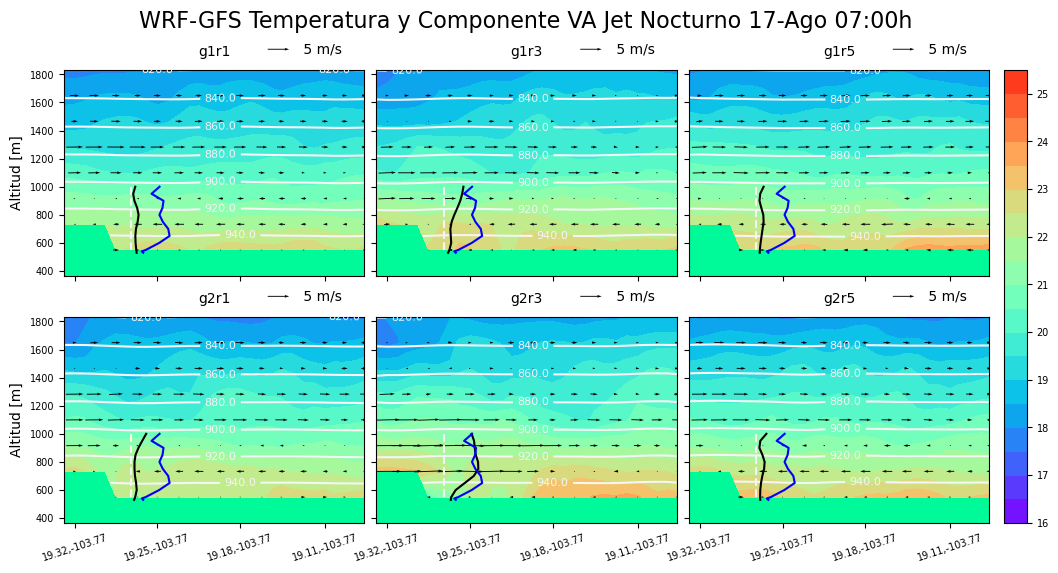

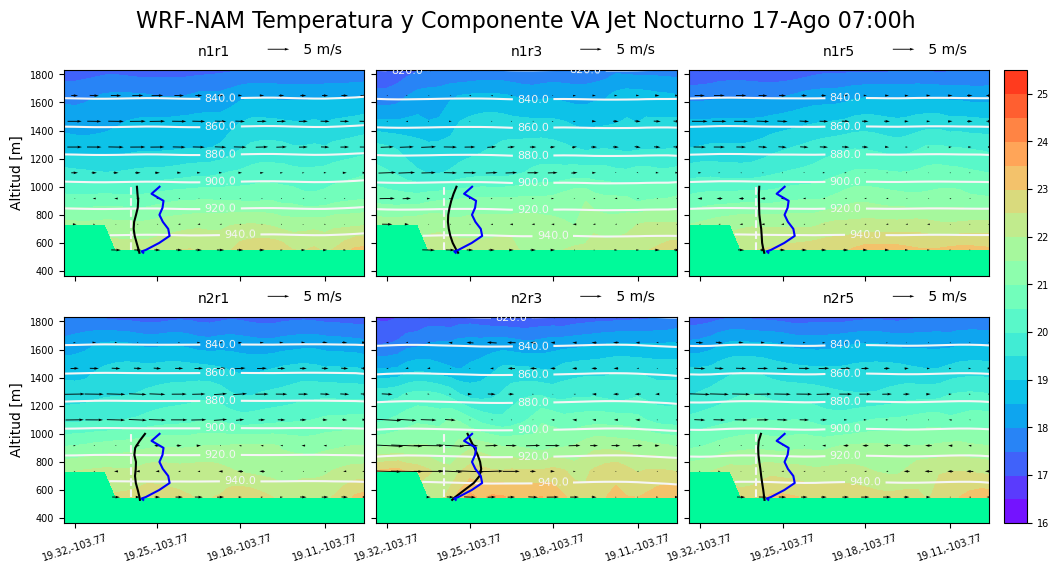

In [45]:
#for times in (14,16,62,64):
for xp in (0,6):
    tt=14
    ang=0
    vmin=16
    vmax=26
    hovtLLJuv1p(xp=xp,tt=tt,angle=ang,vmin=vmin,vmax=vmax,zbot=2,ztop=11)

ncwrf  2012-08-17T07:00:00.000000000 nclocalt  2012-08-17 01:00:00 sodart 2012-08-17 01:00:00
ncwrf  2012-08-17T09:00:00.000000000 nclocalt  2012-08-17 03:00:00 sodart 2012-08-17 03:00:00
ncwrf  2012-08-17T11:00:00.000000000 nclocalt  2012-08-17 05:00:00 sodart 2012-08-17 05:00:00
ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00
ncwrf  2012-08-17T15:00:00.000000000 nclocalt  2012-08-17 09:00:00 sodart 2012-08-17 09:00:00
ncwrf  2012-08-17T17:00:00.000000000 nclocalt  2012-08-17 11:00:00 sodart 2012-08-17 11:00:00
ncwrf  2012-08-17T07:00:00.000000000 nclocalt  2012-08-17 01:00:00 sodart 2012-08-17 01:00:00
ncwrf  2012-08-17T09:00:00.000000000 nclocalt  2012-08-17 03:00:00 sodart 2012-08-17 03:00:00
ncwrf  2012-08-17T11:00:00.000000000 nclocalt  2012-08-17 05:00:00 sodart 2012-08-17 05:00:00
ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00
ncwrf  2012-08-17T15:00:00.000000000 nclocalt  2012-08-17 09

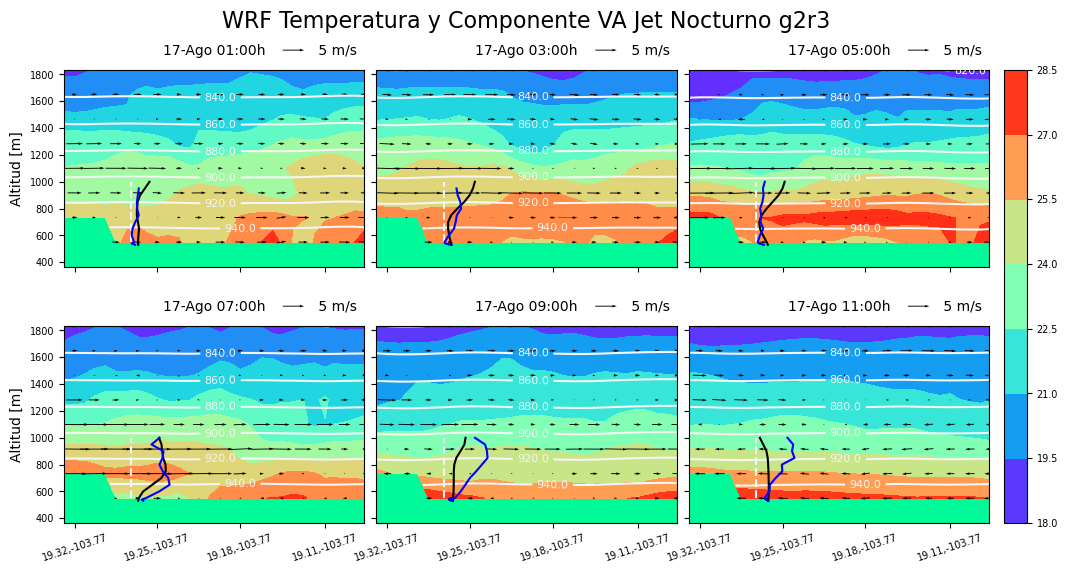

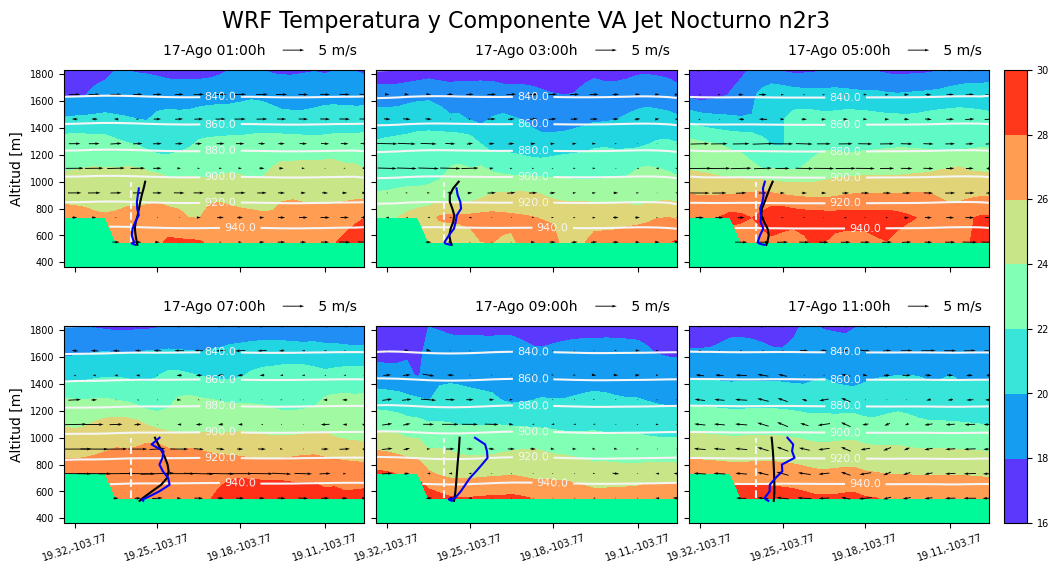

In [46]:
tt = 2
for xp in (4,10):
    ang=0
    vmin=16
    vmax=99
    hovtLLJuv3(xp=xp,tt=tt,dt=4,angle=ang,vmin=vmin,vmax=vmax,zbot=2,ztop=11)

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


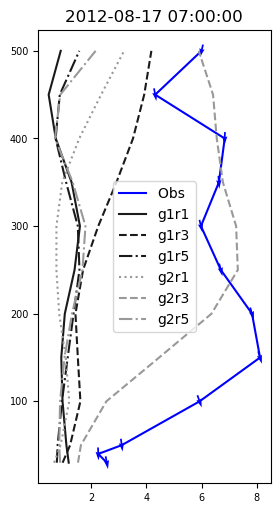

In [47]:
# Este ya es hora local
tt0 = 14
plt.figure(figsize=(3,6))
#plt.ylabel('Altura m')
#plt.xlabel('Velocidad ms-1')
plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
#plt.plot(wrf1[tt0,:], plot_levs, label=expnames[0], ls='-', color='0.1')

timedelta = -6
_, t, _ = utcwrf(tt0, timedelta)
            
plt.title(t)
plt.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
vdir = np.radians(sodard[tt0,:])
xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
plt.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')

plt.plot(wrf1[tt0,:], plot_levs, label=expnames[0], ls='-', color='0.1')
plt.plot(wrf2[tt0,:], plot_levs, label=expnames[1], ls='--', color='0.1')
plt.plot(wrf3[tt0,:], plot_levs, label=expnames[2], ls='-.', color='0.1')
plt.plot(wrf4[tt0,:], plot_levs, label=expnames[3], ls=':',  color='0.6')
plt.plot(wrf5[tt0,:], plot_levs, label=expnames[4], ls='--', color='0.6')      
plt.plot(wrf6[tt0,:], plot_levs, label=expnames[5], ls='-.', color='0.6')
plt.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


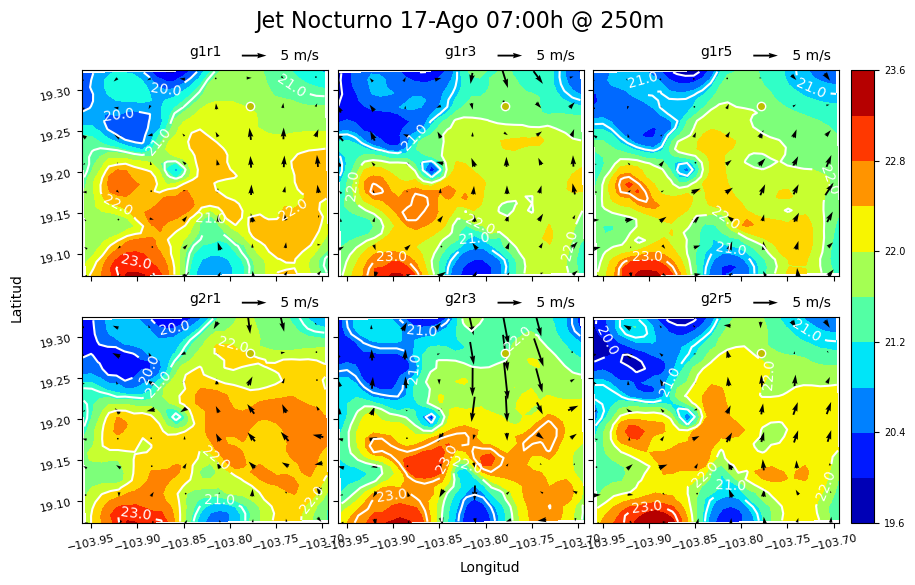

In [48]:
xp=0
tt=14
lev=6
vmin=15
vmax=99
levPlot6t(xp,tt,lev,vmin,vmax)

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


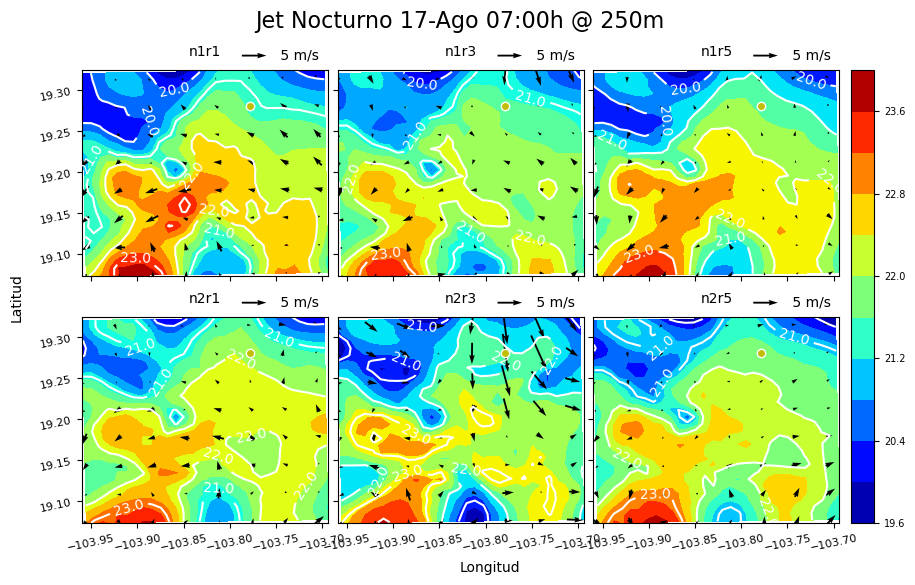

In [49]:
xp=6
tt=14
lev=6
vmin=15
vmax=99
levPlot6t(xp,tt,lev,vmin,vmax)

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


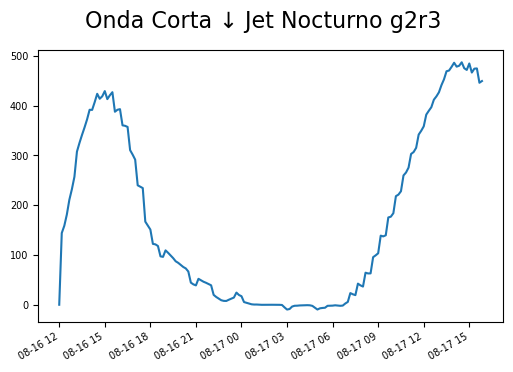

In [50]:
import datetime
tt1, tt2 = 0, 24+12*12
level = 0
xp = 4
fd =d3+expruns[xp]+'.nc'
ncfile = Dataset(fd)  
tc = getvar(ncfile, "HFX", timeidx=wrf.ALL_TIMES)

#t = pd.to_datetime(str(wrftime)) 
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)
            
x = [datetime.datetime.strptime('2012-08-16 12', '%Y-%m-%d %H') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]
p = to_np(tc[tt1:tt2,21,26])
plt.plot(x, p)
plt.suptitle('Onda Corta ↓ Jet Nocturno '+expnames[xp]+'\n', fontsize=16)
plt.gcf().autofmt_xdate()


# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


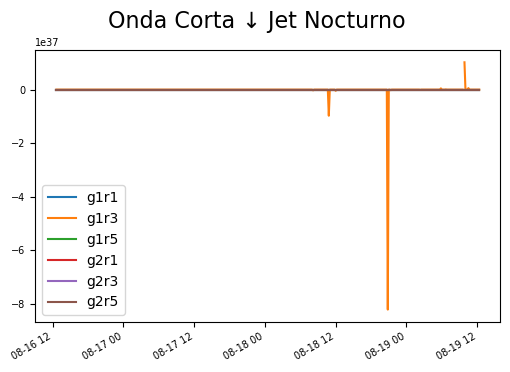

In [51]:
tt1, tt2 = 1, 6*72

level = 0
xp = 4
x = [datetime.datetime.strptime('2012-08-16 12:30', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]

timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in range(6):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "SWDOWN", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np(tc[tt1:tt2,21,26])
    plt.plot(x[1:], p, label=expnames[xp])
plt.suptitle('Onda Corta ↓ Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()

# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


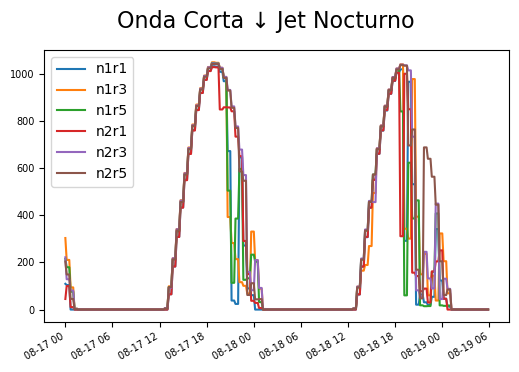

In [52]:
tt1, tt2 = 36, 6*60
level = 0
xp = 4
x = [datetime.datetime.strptime('2012-08-17 00:00', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2-tt1)]

timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in np.arange(6,12):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "SWDOWN", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np(tc[tt1:tt2,21,26])
    plt.plot(x, p, label=expnames[xp])
plt.suptitle('Onda Corta ↓ Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()

# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


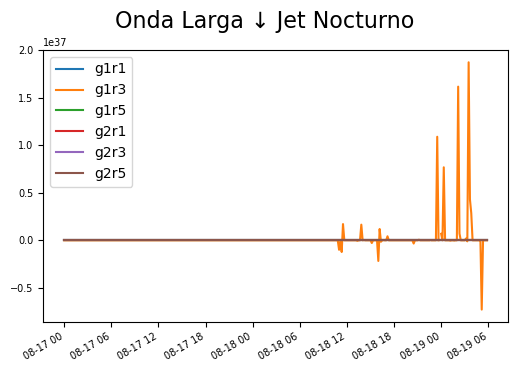

In [53]:
level = 0
#x = [datetime.datetime.strptime('2012-08-16 12:30', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in (0,1,2,3,4,5):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "GLW", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np((tc[tt1:tt2,22,26]+tc[tt1:tt2,21,26]+tc[tt1:tt2,22,26]+\
             tc[tt1:tt2,21,24]+tc[tt1:tt2,21,27])/5)
    plt.plot(x, p, label=expnames[xp])
plt.suptitle('Onda Larga ↓ Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()


# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


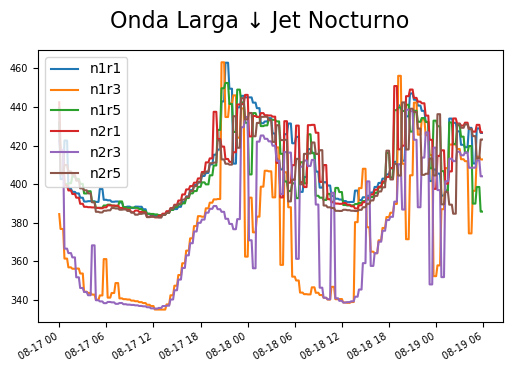

In [54]:
level = 0
#x = [datetime.datetime.strptime('2012-08-16 12:30', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in np.arange(6,12):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "GLW", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np((tc[tt1:tt2,22,26]+tc[tt1:tt2,21,26]+tc[tt1:tt2,22,26]+\
             tc[tt1:tt2,21,24]+tc[tt1:tt2,21,27])/5)
    plt.plot(x, p, label=expnames[xp])
plt.suptitle('Onda Larga ↓ Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()


# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


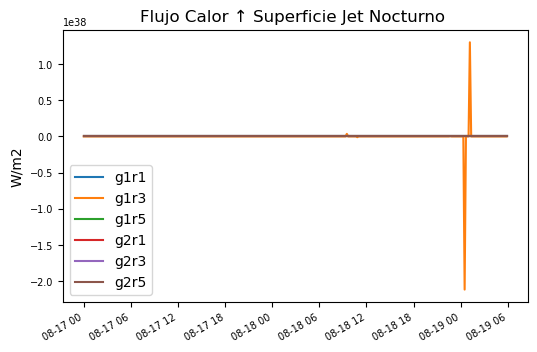

In [55]:
#tt1, tt2 = 24, 24+6*24
xp = 4
level = 0
#x = [datetime.datetime.strptime('2012-08-16 12:30', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in range(6):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "HFX", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np(tc[tt1:tt2,21,26])
    plt.plot(x, p, label=expnames[xp])
    
plt.ylabel('W/m2')
plt.title('Flujo Calor ↑ Superficie Jet Nocturno ')
#plt.suptitle('Flujo Calor ↑ Superficie Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()

# Alt+25 ↓
# Alt+24 ↑

ncwrf  2012-08-17T13:00:00.000000000 nclocalt  2012-08-17 07:00:00 sodart 2012-08-17 07:00:00


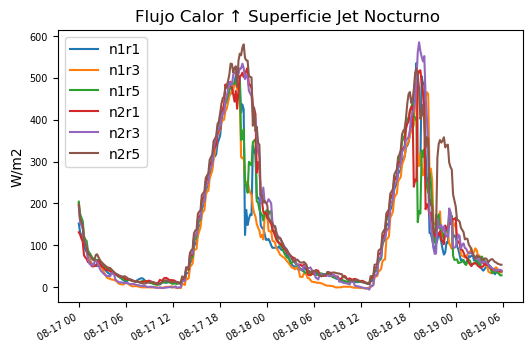

In [56]:
#tt1, tt2 = 24, 24+6*24
xp = 4
level = 0
#x = [datetime.datetime.strptime('2012-08-16 12:30', '%Y-%m-%d %H:%M') + 10*datetime.timedelta(minutes=i) for i in range(tt2)]
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

for xp in (6,7,8,9,10,11):
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    tc = getvar(ncfile, "HFX", timeidx=wrf.ALL_TIMES)
    #tc = wrf.extract_vars(ncfile, varnames="SWDOWN", timeidx=wrf.ALL_TIMES)
    p = to_np(tc[tt1:tt2,21,26])
    plt.plot(x, p, label=expnames[xp])
    
plt.ylabel('W/m2')
plt.title('Flujo Calor ↑ Superficie Jet Nocturno ')
#plt.suptitle('Flujo Calor ↑ Superficie Jet Nocturno ', fontsize=16)
plt.legend()
plt.gcf().autofmt_xdate()

# Alt+25 ↓
# Alt+24 ↑

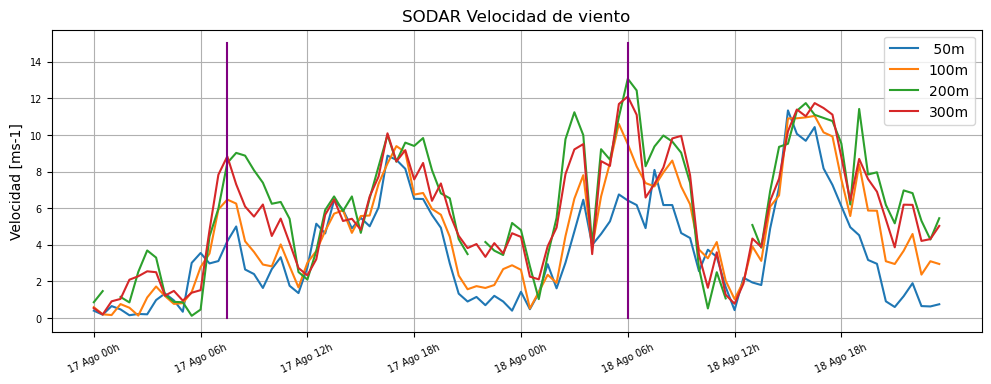

In [57]:
sp = pd.read_pickle('sodar_sp.pk')

fig = plt.figure(figsize=[12,4])
s50 =   sp['spd_50'][t1:t4]
s100 =  sp['spd_50'][t1:t4]
s100 = sp['spd_100'][t1:t4]
s200 = sp['spd_300'][t1:t4]
s300 = sp['spd_200'][t1:t4]

nx = s100.size
xdelta = 6
xloc = np.arange(nx)
tickname = s100[::xdelta*2].index.strftime('%d Ago %Hh').tolist()
plt.xticks(np.arange(nx)[::xdelta*2], tickname, rotation=25);
plt.plot(xloc, s50, label=' 50m')
plt.plot(xloc, s100, label='100m')
plt.plot(xloc, s200, label='200m')
plt.plot(xloc, s300, label='300m')

h = 16
plt.plot([15]*h,range(h), color='purple')
#plt.plot([34]*h,range(h), color='purple')
plt.plot([60]*h,range(h), color='purple')
#plt.plot([80]*h,range(h), color='purple')


plt.ylabel('Velocidad [ms-1]')
#plt.xlabel('Fecha')
plt.grid(True)
plt.legend()

plt.title('SODAR Velocidad de viento')
figname='wrf_spd_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)
plt.show()

In [58]:
# http://www.meteo.unican.es/wiki/cordexwrf/OutputVariables
# DOWNWARD SHORT WAVE FLUX AT GROUND SURFACE